In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
train_data_frame = pd.read_csv('./data_01_train.csv')
print(train_data_frame.columns.values.tolist())
train_data = train_data_frame['close']

test_data_frame = pd.read_csv('./data_01_test.csv')
print(test_data_frame.columns.values.tolist())
test_data = test_data_frame['close']

['date', 'open', 'high', 'low', 'close', 'volume']
['date', 'open', 'high', 'low', 'close', 'volume']


In [3]:
# 数据归一化
class MinMaxScaler:
    def __init__(self):
        self.min_num = None
        self.max_num = None

    def fit(self, data):
        self.max_num = np.max(data)
        self.min_num = np.min(data)

    def transform(self, data):
        return (data - self.min_num) / (self.max_num - self.min_num)

    def inverse_transform(self, data):
        return data * (self.max_num - self.min_num) + self.min_num
    
train_scaler = MinMaxScaler()
train_scaler.fit(train_data)
train_data_normalize = train_scaler.transform(train_data)

test_scaler = MinMaxScaler()
test_scaler.fit(test_data)
test_data_normalize = test_scaler.transform(test_data)

print(train_data[:10])
print(train_data_normalize[:10])
print(test_data[:10])
print(test_data_normalize[:10])

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
5    26.76
6    26.94
7    26.72
8    26.72
9    25.93
Name: close, dtype: float64
0    0.099027
1    0.107782
2    0.108366
3    0.093580
4    0.096887
5    0.059728
6    0.063230
7    0.058949
8    0.058949
9    0.043580
Name: close, dtype: float64
0    53.33
1    53.83
2    54.74
3    54.45
4    53.95
5    55.10
6    55.65
7    56.22
8    55.27
9    56.74
Name: close, dtype: float64
0    0.000000
1    0.012817
2    0.036145
3    0.028711
4    0.015893
5    0.045373
6    0.059472
7    0.074084
8    0.049731
9    0.087413
Name: close, dtype: float64


In [4]:
# 每次使用前8个数据，预测第9个数据
def exchange_data(data, count=8):
    X = []
    y = []
    for index in range(len(data) - count):
        X.append(data[index:index + count])
        y.append(data[index + count])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], -1)
    y = np.array(y)
    return X, y

In [5]:
# 数据变型
X_train, y_train = exchange_data(data=train_data_normalize, count=8)
X_test, y_test = exchange_data(data=test_data_normalize, count=8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(723, 8, 1) (723,) (174, 8, 1) (174,)


In [6]:
# 建立RNN模型
rnn_model = Sequential()
# 输入层
rnn_model.add(
    SimpleRNN(
        units=5,
        input_shape=(8, 1),
        activation='relu'
    )
)
# 输出层
rnn_model.add(
    Dense(
        units=1,
        activation='linear'
    )
)
# 设置损失函数和最优化方法
rnn_model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)
# 查看模型结构
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 模型训练
rnn_model.fit(
    X_train, y_train,
    batch_size=100,
    epochs=200,
    verbose=1
)

Epoch 1/200
723/723 [==============================] - 0s 538us/step - loss: 1.6422
Epoch 2/200
723/723 [==============================] - 0s 40us/step - loss: 1.1065
Epoch 3/200
723/723 [==============================] - 0s 29us/step - loss: 0.7659
Epoch 4/200
723/723 [==============================] - 0s 13us/step - loss: 0.5559
Epoch 5/200
723/723 [==============================] - 0s 43us/step - loss: 0.4194
Epoch 6/200
723/723 [==============================] - 0s 32us/step - loss: 0.3281
Epoch 7/200
723/723 [==============================] - 0s 32us/step - loss: 0.2579
Epoch 8/200
723/723 [==============================] - 0s 32us/step - loss: 0.2053
Epoch 9/200
723/723 [==============================] - 0s 28us/step - loss: 0.1646
Epoch 10/200
723/723 [==============================] - 0s 29us/step - loss: 0.1347
Epoch 11/200
723/723 [==============================] - 0s 32us/step - loss: 0.1105
Epoch 12/200
723/723 [==============================] - 0s 29us/step - loss: 0.0922


723/723 [==============================] - 0s 37us/step - loss: 0.0015
Epoch 99/200
723/723 [==============================] - 0s 43us/step - loss: 0.0015
Epoch 100/200
723/723 [==============================] - 0s 41us/step - loss: 0.0014
Epoch 101/200
723/723 [==============================] - 0s 43us/step - loss: 0.0013
Epoch 102/200
723/723 [==============================] - 0s 39us/step - loss: 0.0013
Epoch 103/200
723/723 [==============================] - 0s 37us/step - loss: 0.0012
Epoch 104/200
723/723 [==============================] - 0s 34us/step - loss: 0.0012
Epoch 105/200
723/723 [==============================] - 0s 32us/step - loss: 0.0012
Epoch 106/200
723/723 [==============================] - 0s 34us/step - loss: 0.0011
Epoch 107/200
723/723 [==============================] - 0s 34us/step - loss: 0.0011
Epoch 108/200
723/723 [==============================] - 0s 52us/step - loss: 0.0010
Epoch 109/200
723/723 [==============================] - 0s 63us/step - loss: 0.

723/723 [==============================] - 0s 51us/step - loss: 4.3009e-04
Epoch 191/200
723/723 [==============================] - 0s 53us/step - loss: 4.2920e-04
Epoch 192/200
723/723 [==============================] - 0s 51us/step - loss: 4.2849e-04
Epoch 193/200
723/723 [==============================] - 0s 39us/step - loss: 4.2764e-04
Epoch 194/200
723/723 [==============================] - 0s 36us/step - loss: 4.2674e-04
Epoch 195/200
723/723 [==============================] - 0s 34us/step - loss: 4.2574e-04
Epoch 196/200
723/723 [==============================] - 0s 36us/step - loss: 4.2497e-04
Epoch 197/200
723/723 [==============================] - 0s 48us/step - loss: 4.2416e-04
Epoch 198/200
723/723 [==============================] - 0s 41us/step - loss: 4.2339e-04
Epoch 199/200
723/723 [==============================] - 0s 40us/step - loss: 4.2241e-04
Epoch 200/200
723/723 [==============================] - 0s 37us/step - loss: 4.2142e-04


In [8]:
# train score
y_train_src = train_scaler.inverse_transform(y_train)
y_train_predict = rnn_model.predict(X_train)
y_train_predict_src = train_scaler.inverse_transform(y_train_predict)
train_score = r2_score(y_true=y_train_src, y_pred=y_train_predict_src)
print(train_score)

0.9956677335089239


In [9]:
# test score
y_test_src = test_scaler.inverse_transform(y_test)
y_test_predict = rnn_model.predict(X_test)
y_test_predict_src = test_scaler.inverse_transform(y_test_predict)
test_score = r2_score(y_true=y_test_src, y_pred=y_test_predict_src)
print(test_score)

0.9734797591394674


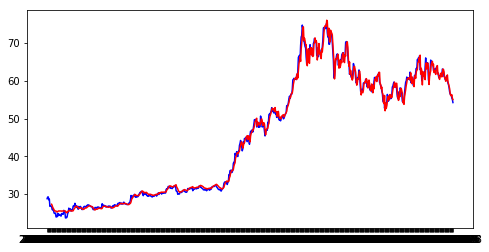

<Figure size 2880x2880 with 0 Axes>

In [14]:
# train
import matplotlib.pyplot as plt
date = train_data_frame['date']
plt.plot(date, train_data_frame['close'], color='b')

plt.plot(date[8:], y_train_predict_src, color='r')

plt.figure(figsize=(40, 40))
plt.show()

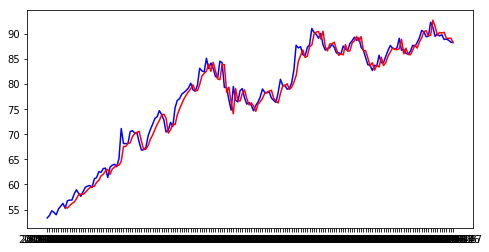

<Figure size 2880x2880 with 0 Axes>

In [15]:
# test
date = test_data_frame['date']
plt.plot(date, test_data_frame['close'], color='b')

plt.plot(date[8:], y_test_predict_src, color='r')

plt.figure(figsize=(40, 40))
plt.show()